<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-b3fdaf15785b>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Become familiar with the dataset

In [8]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [12]:
boston_df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


In [16]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.4 KB


# Task 2: Generate Descriptive Statistics and Visualizations

### 2.1: For the "Median value of owner-occupied homes" provide a boxplot

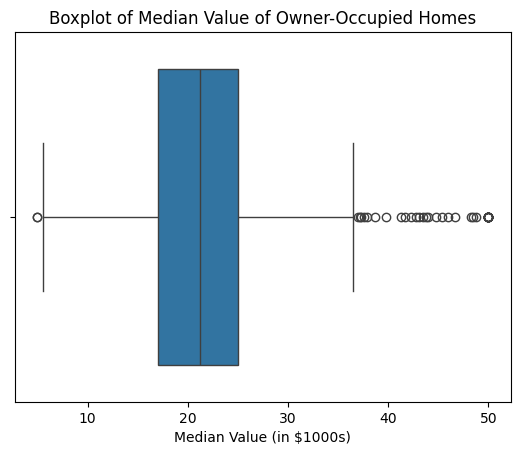

In [20]:
axs = sns.boxplot(data=boston_df,x=boston_df['MEDV'])
pyplot.title('Boxplot of Median Value of Owner-Occupied Homes')
pyplot.xlabel('Median Value (in $1000s)')                 
pyplot.show()

### 2.2: Provide a  bar plot for the Charles river variable

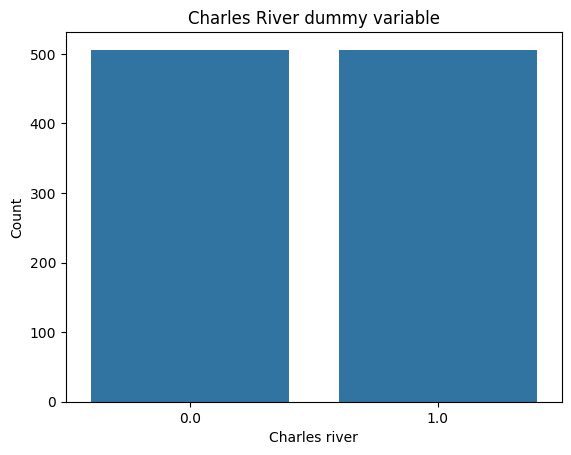

In [24]:
axs = sns.barplot(data=boston_df,x=boston_df['CHAS'],y=boston_df['CHAS'].count())
pyplot.title('Charles River dummy variable')
pyplot.xlabel('Charles river') 
pyplot.ylabel('Count') 
pyplot.show()

### 2.3: Provide a boxplot for the MEDV variable vs the AGE variable.

Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older.


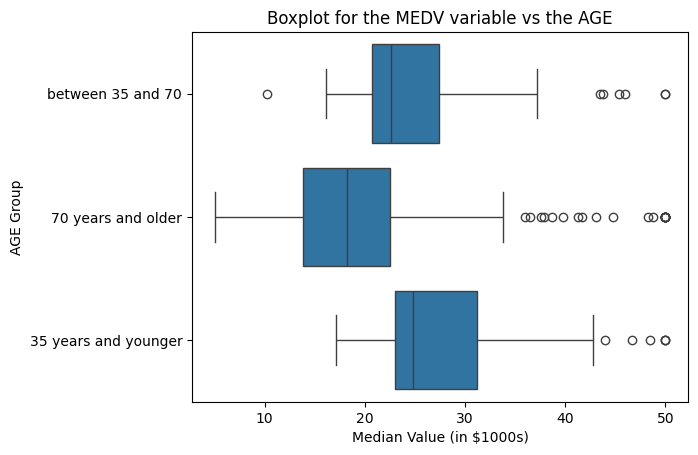

In [39]:
boston_df.loc[(boston_df['AGE'] <= 35),'age_group'] = '35 years and younger'
boston_df.loc[((boston_df['AGE'] > 35) & (boston_df['AGE'] < 70) ),'age_group'] = 'between 35 and 70'
boston_df.loc[(boston_df['AGE'] >= 70),'age_group'] = '70 years and older'

axs = sns.boxplot(data=boston_df,x=boston_df['MEDV'],y=boston_df['age_group'])
pyplot.title('Boxplot for the MEDV variable vs the AGE')
pyplot.xlabel('Median Value (in $1000s)')   
pyplot.ylabel('AGE Group') 
pyplot.show()

### 2.4: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town.

 What can you say about the relationship?

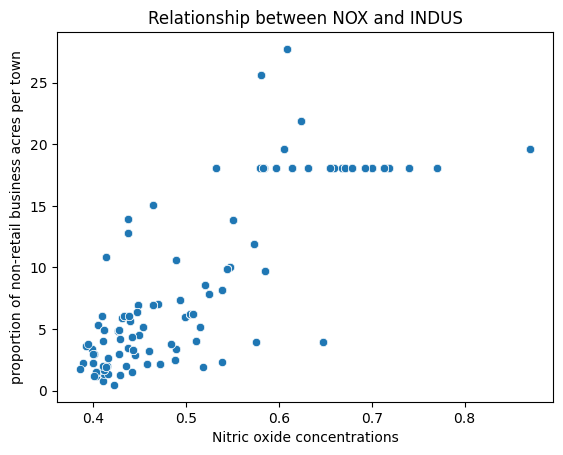

In [42]:
sns.scatterplot(data=boston_df,x=boston_df['NOX'],y=boston_df['INDUS'])
pyplot.title("Relationship between NOX and INDUS")
pyplot.xlabel("Nitric oxide concentrations")
pyplot.ylabel("proportion of non-retail business acres per town")
pyplot.show()

### 2.5: Create a histogram for the pupil to teacher ratio variable

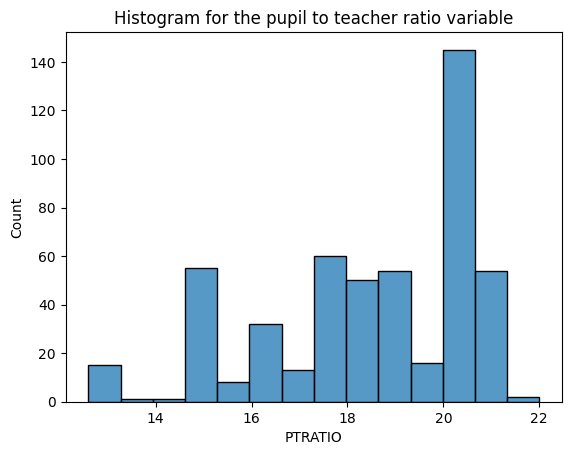

In [43]:
sns.histplot(data=boston_df,x=boston_df['PTRATIO'])
pyplot.title("Histogram for the pupil to teacher ratio variable")
pyplot.show()

# Task 3: Use the appropriate tests to answer the questions provided.

Be sure to:-
- State your hypothesis.
- Use α = 0.05
- Perform the test Statistics.
- State the conclusion from the test.

### 3.1: Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

**Null Hypothesis (H₀):**   $\mu_{\text{CHAS}=1} = \mu_{\text{CHAS}=0}$

There is no significant difference in the median value of houses between those bounded by the Charles River and those not bounded by it.

**Alternative Hypothesis (H₁):**   $\mu_{\text{CHAS}=1} \ne \mu_{\text{CHAS}=0}$

The two groups have a significant difference in the median value of houses.


In [44]:
medv_river = boston_df[boston_df['CHAS'] == 1]['MEDV']
medv_nonriver = boston_df[boston_df['CHAS'] == 0]['MEDV']

# Perform an independent t-test
t_stat, p_val = scipy.stats.ttest_ind(medv_river, medv_nonriver, equal_var=False)  # Welch's t-test

# Print the results
print(f"T-statistic: {t_stat:.4f}")
print(f"P-value: {p_val:.4f}")

# Interpret the result
if p_val < 0.05:
    print("There is a significant difference in median house value between properties bounded by the Charles River and those that are not.")
else:
    print("There is no significant difference in median house value between the two groups.")

T-statistic: 3.1133
P-value: 0.0036
There is a significant difference in median house value between properties bounded by the Charles River and those that are not.


### 3.2: Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

**Null Hypothesis (H₀):**   $\mu_{\text{group1}} = \mu_{\text{group2}} = \mu_{\text{group3}}$

The mean median house value (MEDV) is equal across all age groups of properties based on the proportion of owner-occupied units built prior to 1940 (AGE).

**Alternative Hypothesis (H₁):**  

At least one group has a different mean median house value (MEDV).


In [45]:
group1 = boston_df[boston_df['age_group'] == '35 years and younger']['MEDV']
group2 = boston_df[boston_df['age_group'] == 'between 35 and 70']['MEDV']
group3 = boston_df[boston_df['age_group'] == '70 years and older']['MEDV']

f_stat, p_val = scipy.stats.f_oneway(group1, group2, group3)

print(f"F-statistic: {f_stat:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant difference in MEDV across AGE groups.")
else:
    print("There is no significant difference in MEDV across AGE groups.")

F-statistic: 36.4076
P-value: 0.0000
There is a significant difference in MEDV across AGE groups.


### 3.3: Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

**Null Hypothesis (H₀):**  $ H_0: \ \rho = 0 $

There is no linear relationship between `NOX` (nitric oxide concentrations) and `INDUS` (proportion of non-retail business acres per town).  



**Alternative Hypothesis (H₁):**  $ H_1: \ \rho \ne 0 $

There is a linear relationship between `NOX` and `INDUS`.



In [49]:
corr_coef, p_val = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Pearson Correlation Coefficient: {corr_coef:.4f}")
print(f"P-value: {p_val:.4f}")

if p_val < 0.05:
    print("There is a significant linear relationship between NOX and INDUS.")
    
else:
    print("There is no significant linear relationship between NOX and INDUS.")
    

Pearson Correlation Coefficient: 0.7637
P-value: 0.0000
There is a significant linear relationship between NOX and INDUS.


### 3.4: What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

**Null Hypothesis (H₀):**   $H_0: \ \beta_1 = 0$  
There is no linear relationship between `DIS` and `MEDV`.



**Alternative Hypothesis (H₁):**   $H_1: \ \beta_1 \ne 0$  
There is a linear relationship between `DIS` and `MEDV`.



In [53]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

p_val_dis = model.pvalues['DIS']
print(f"\nP-value for DIS: {p_val_dis:.4f}")

if p_val_dis < 0.05:
    print("We reject the null hypothesis.DIS has a statistically significant impact on MEDV.")
else:
    print("DIS does NOT have a statistically significant impact on MEDV.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Apr 2025   Prob (F-statistic):           1.21e-08
Time:                        17:17:34   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0